# Doctor Visit Analysis With Python

Let us import necessary libraries


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Let us import csv file of data set and check starting 5 rows of dataset

In [2]:
df=pd.read_csv("DoctorVisits - DA.csv")
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


Let us see complete info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


let us perform some cleaning of data set

In [4]:
df["age"]=df["age"]*100

In [5]:
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19.0,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,19.0,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,19.0,0.90,3,0,0,no,no,no,no,no
3,4,1,male,19.0,0.15,1,0,0,no,no,no,no,no
4,5,1,male,19.0,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22.0,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,27.0,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,37.0,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,52.0,0.65,0,0,0,no,no,no,no,no


In [6]:
df["income"]=df["income"]*10000

In [7]:
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19.0,5500.0,1,4,1,yes,no,no,no,no
1,2,1,female,19.0,4500.0,1,2,1,yes,no,no,no,no
2,3,1,male,19.0,9000.0,3,0,0,no,no,no,no,no
3,4,1,male,19.0,1500.0,1,0,0,no,no,no,no,no
4,5,1,male,19.0,4500.0,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22.0,5500.0,0,0,0,no,no,no,no,no
5186,5187,0,male,27.0,13000.0,0,0,1,no,no,no,no,no
5187,5188,0,female,37.0,2500.0,1,0,1,no,no,yes,no,no
5188,5189,0,female,52.0,6500.0,0,0,0,no,no,no,no,no


In [8]:
df.shape

(5190, 13)

In [9]:
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,40.638536,5831.599229,1.431985,0.861850,1.217534
std,1498.368279,0.798134,20.478182,3689.066984,1.384152,2.887628,2.124266
min,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,22.000000,2500.000000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,32.000000,5500.000000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,62.000000,9000.000000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,72.000000,15000.000000,5.000000,14.000000,12.000000


In [10]:
df.isnull()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,False,False,False,False,False,False,False,False,False,False,False,False,False
5186,False,False,False,False,False,False,False,False,False,False,False,False,False
5187,False,False,False,False,False,False,False,False,False,False,False,False,False
5188,False,False,False,False,False,False,False,False,False,False,False,False,False


So there are no null values in the given data set

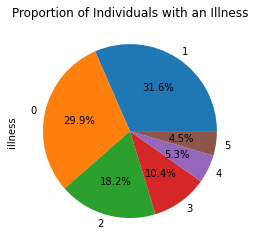

In [11]:
illness_counts = df['illness'].value_counts()
illness_counts.plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Individuals with an Illness')
plt.show()

In [12]:
df['illness'].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

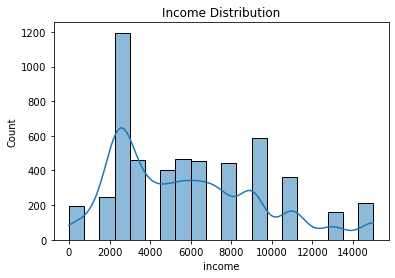

In [13]:
# Income distribution
sns.histplot(x='income', data=df, kde=True)
plt.title('Income Distribution')
plt.show()

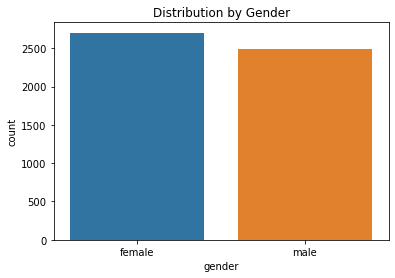

In [14]:
# distribution by gender
sns.countplot(x='gender', data=df)
plt.title('Distribution by Gender')
plt.show()

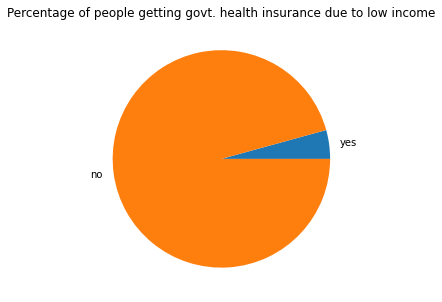

In [15]:
labels=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
figsize=(5,5)
plt.figure(figsize=figsize)
plt.pie(x,labels=labels)
plt.title('Percentage of people getting govt. health insurance due to low income')
plt.show()

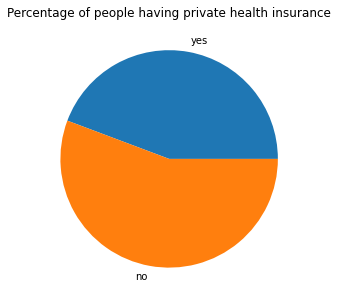

In [16]:
Y=df[df['private']=='yes']
N=df[df['private']=='no'] 
x=[Y.shape[0],N.shape[0]]
figsize=(5,5)
plt.figure(figsize=figsize)
plt.pie(x,labels=labels)
plt.title('Percentage of people having private health insurance')
plt.show()

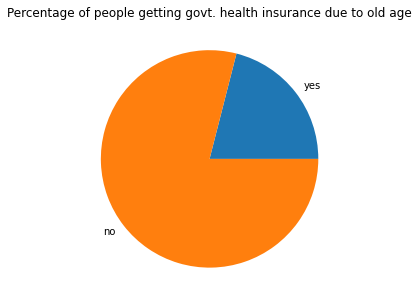

In [17]:
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
figsize=(5,5)
plt.figure(figsize=figsize)
plt.pie(x,labels=labels)
plt.title('Percentage of people getting govt. health insurance due to old age')
plt.show()

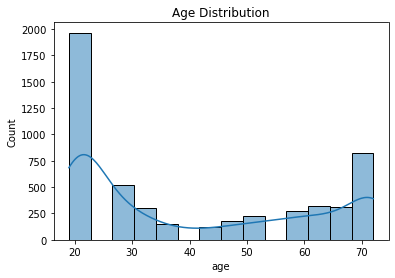

In [18]:
# Age distribution
sns.histplot(x='age', data=df, kde=True)
plt.title('Age Distribution')
plt.show()

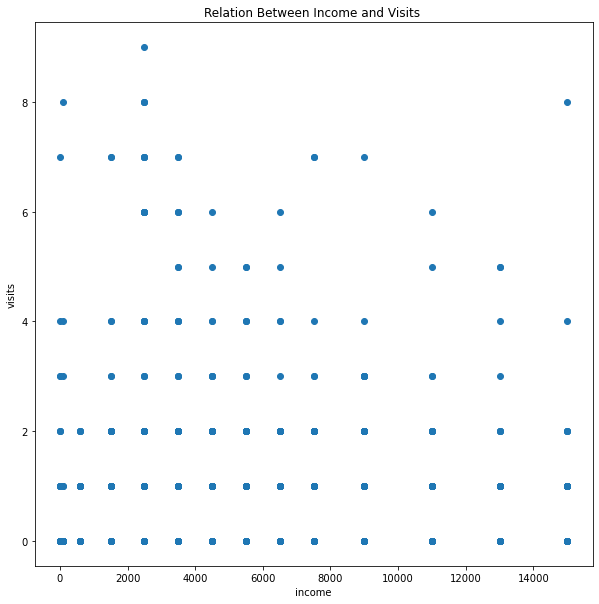

In [19]:
#relation between income and visits

figsize = (10, 10)
plt.figure(figsize=figsize)
plt.scatter(x='income', y='visits', data=df)
plt.title('Relation Between Income and Visits ')
plt.xlabel('income')
plt.ylabel('visits')
plt.show()



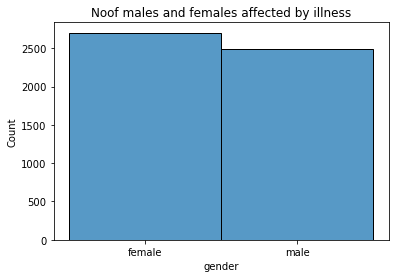

In [20]:
#noof males and females affected by illness

sns.histplot(df.gender,bins=2)
plt.title("Noof males and females affected by illness")
plt.show()

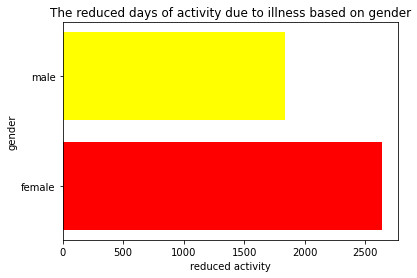

In [21]:
dg=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(dg['gender'],dg['reduced'],color=['red','yellow'])
plt.title('The reduced days of activity due to illness based on gender')
plt.ylabel('gender')
plt.xlabel('reduced activity')
plt.show()

In [22]:
# Analysis by age group
age_groups = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, float('inf')],
                    labels=['<18', '18-35', '36-50', '51-65', '65+'])
df['age_group'] = age_groups
age_group_visits = df.groupby('age_group')['visits'].mean()
print("\nAverage number of visits by age group:")
print(age_group_visits)


Average number of visits by age group:
age_group
<18           NaN
18-35    0.219433
36-50    0.275938
51-65    0.385943
65+      0.453826
Name: visits, dtype: float64


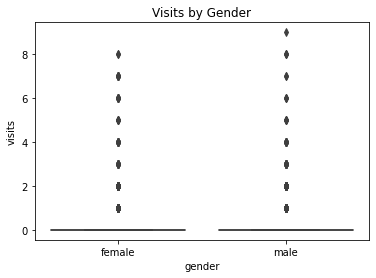

In [23]:
#Box plot of visits by gender:
sns.boxplot(x='gender', y='visits', data=df)
plt.title('Visits by Gender')
plt.show()

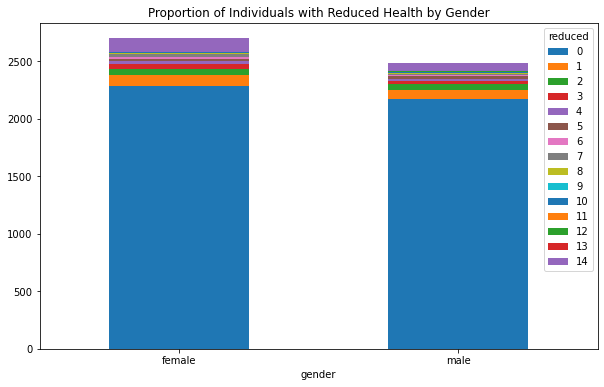

In [24]:
#Stacked bar plot of the proportion of individuals with reduced health by gender:


reduced_health_gender = df.groupby(['gender', 'reduced']).size().unstack()
ax = reduced_health_gender.plot(kind='bar', stacked=True)
plt.title('Proportion of Individuals with Reduced Health by Gender')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xticks(rotation=0)
plt.show()


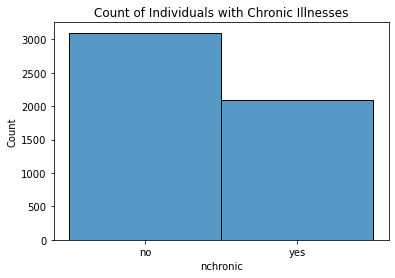

In [25]:
#hist plot of the count of individuals with chronic illnesses

sns.histplot(x='nchronic', data=df)
plt.title('Count of Individuals with Chronic Illnesses')
plt.show()

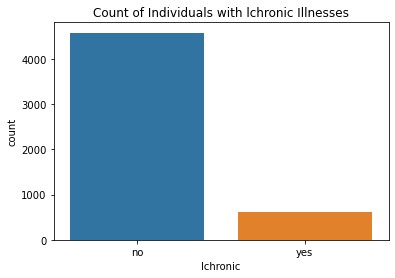

In [26]:
#Bar plot of the count of individuals with chronic illnesses

sns.countplot(x='lchronic', data=df)
plt.title('Count of Individuals with lchronic Illnesses')
plt.show()

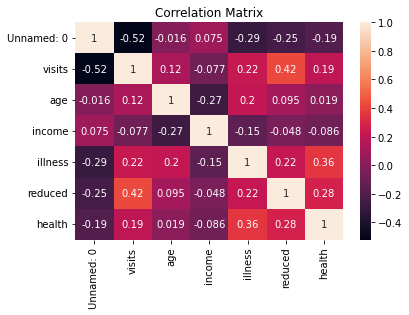

In [27]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

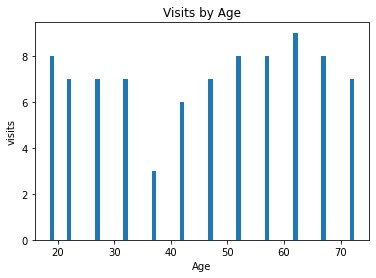

In [28]:
plt.bar(df['age'],df['visits'])
plt.xlabel('Age')
plt.ylabel('visits')
plt.title('Visits by Age')
plt.show()